<a href="https://colab.research.google.com/github/indiradatta5/Customer_churn_classifier/blob/main/customer_churn_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, regularizers, callbacks
import matplotlib.pyplot as plt
from tensorflow.keras import utils


### Upload and Save File

This cell prompts the user to upload a file, saves it in Colab, and confirms the successful save.


In [34]:
from google.colab import files

# Prompt the user to upload a file
uploaded = files.upload()

# Assuming you uploaded a file named 'example.csv'
filename = next(iter(uploaded))  # Get the first key in the dictionary

# Save the uploaded file
with open(filename, 'wb') as f:
    f.write(uploaded[filename])

print(f"{filename} has been saved.")


Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv
WA_Fn-UseC_-Telco-Customer-Churn.csv has been saved.


### Telco Customer Churn Dataset Preparation

This code loads Telco customer churn data from a CSV, converts 'TotalCharges' to numeric, drops the 'customerID' column, encodes categorical variables, and drops rows with missing data.


In [41]:
import pandas as pd

# Assuming you have a CSV file with housing data, load it
# Replace 'housing_data.csv' with your actual file path
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Display the first few rows of the dataset to understand its structure
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.drop(['customerID'], axis=1, inplace=True)  # Drop customerID column

# Encode categorical variables
df = pd.get_dummies(df)

# Drop rows with missing values
df.dropna(inplace=True)

### Exploring Dataset Structure and Columns

This section displays the first few rows of the Telco customer churn dataset and provides an overview of its structure and columns.



In [42]:
# Explore dataset structure and columns
print(df.head())  # Display first few rows of data
print(df.info())  # Display information about columns and data types
print(df.describe())

   SeniorCitizen  tenure  MonthlyCharges  TotalCharges  gender_Female  \
0              0       1           29.85         29.85           True   
1              0      34           56.95       1889.50          False   
2              0       2           53.85        108.15          False   
3              0      45           42.30       1840.75          False   
4              0       2           70.70        151.65           True   

   gender_Male  Partner_No  Partner_Yes  Dependents_No  Dependents_Yes  ...  \
0        False       False         True           True           False  ...   
1         True        True        False           True           False  ...   
2         True        True        False           True           False  ...   
3         True        True        False           True           False  ...   
4        False        True        False           True           False  ...   

   Contract_One year  Contract_Two year  PaperlessBilling_No  \
0              False  

### Exploring Telco Customer Churn Dataset

This section explores the Telco customer churn dataset, focusing on visualizing the distribution of monthly charges and understanding correlations between variables using a heatmap.



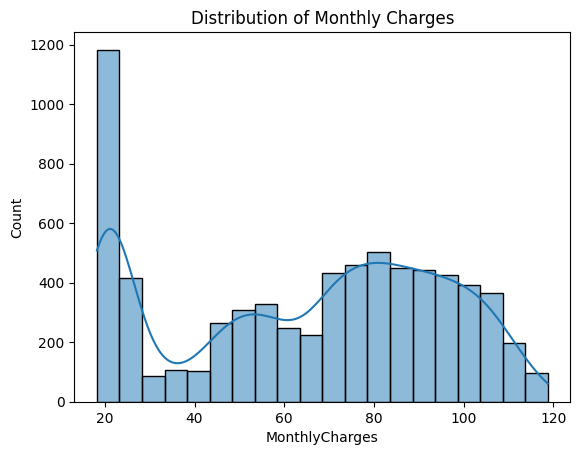

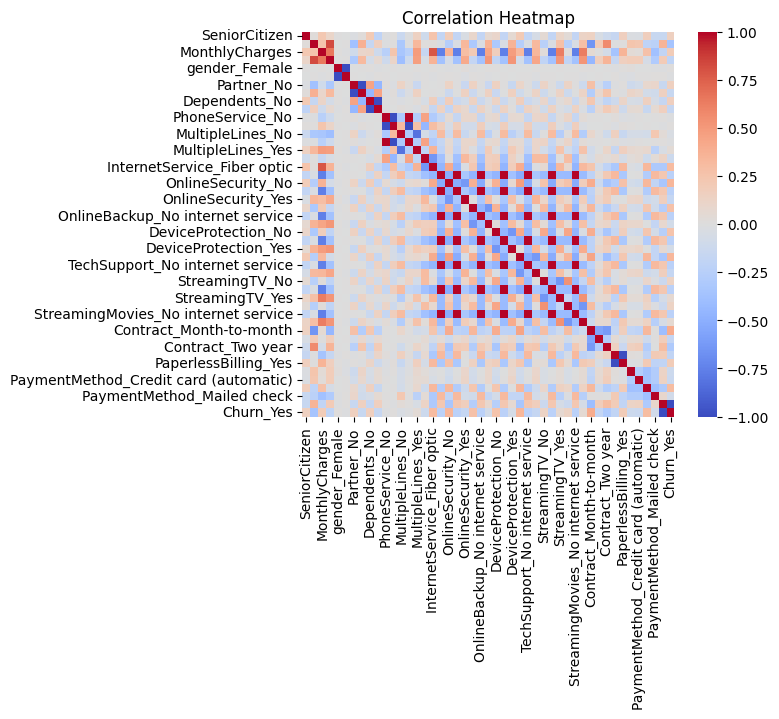

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize distributions and relationships
sns.histplot(df['MonthlyCharges'], bins=20, kde=True)
plt.title('Distribution of Monthly Charges')
plt.show()



# Correlation heatmap
corr_matrix = df.corr()
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


### Preparing Data for Churn Prediction Model

This section prepares the Telco customer churn dataset for modeling. It separates features from the target variable, standardizes numerical features, and ensures the target variable is in a suitable format for modeling.



In [50]:
# Separate features and target variable
X = df.drop(['Churn_No', 'Churn_Yes'], axis=1)  # Assuming 'customerID' is dropped
y = df['Churn_Yes']  # Assuming 'Churn_Yes' is the target variable indicating churned customers

# If needed, you can convert 'y' to binary labels (0 or 1)
# For example, if 'Churn_Yes' is 'Yes' or 'No', convert to 1 or 0:
y = y.replace({'Yes': 1, 'No': 0})

# Standardize numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


### Splitting Data into Training and Testing Sets

This step divides the preprocessed data into training and testing sets for model training and evaluation.


In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


### Initializing Logistic Regression Model

This step initializes a logistic regression model for classification tasks.


In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression()


### Fitting the Logistic Regression Model

This step fits the logistic regression model to the training data.

In [53]:
model.fit(X_train, y_train)


LogisticRegression()

### Making Predictions

This step predicts the churn status using the logistic regression model on the test data.


In [54]:
y_pred = model.predict(X_test)


### Model Evaluation

The model predictions were evaluated using classification metrics and confusion matrix to assess performance:

- **Classification Report**: Provides precision, recall, F1-score, and support for each class (churned and not churned).
- **Confusion Matrix**: Displays true positives, true negatives, false positives, and false negatives, summarizing prediction results.


In [55]:
print(classification_report(y_test, y_pred))
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)


              precision    recall  f1-score   support

       False       0.83      0.88      0.86      1033
        True       0.62      0.52      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

[[914 119]
 [181 193]]


### Hyperparameter Tuning with GridSearchCV

Hyperparameters of the logistic regression model were tuned using GridSearchCV:

- **Parameters Searched**: Regularization parameter `C` and penalty `penalty`.
- **Grid Search Cross-validation**: 5-fold cross-validation was used to evaluate each combination of parameters.
- **Best Parameters**: The optimal parameters found were `C=10` and `penalty='l2'`.

These parameters were selected based on their performance in maximizing the model's predictive accuracy on the validation set.


In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid
param_grid = {'C': [0.1, 1, 10, 100], 'penalty': ['l2']}

# Create GridSearchCV
grid = GridSearchCV(LogisticRegression(solver='lbfgs'), param_grid, cv=5)
grid.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print("Best parameters:", grid.best_params_)


Best parameters: {'C': 10, 'penalty': 'l2'}


### Logistic Regression Model Fitting with Best Parameters

A logistic regression model was fitted using the best parameters obtained from GridSearchCV:

- **Parameters Used**: Regularization parameter `C=10` and penalty `penalty='l2'`.
- **Model Training**: The logistic regression model was trained on the standardized training data (`X_train` and `y_train`).
- **Performance Evaluation**:
  - **Training Accuracy**: The accuracy of the model on the training set was calculated to be `{train_accuracy:.3f}`.
  - **Test Accuracy**: The accuracy of the model on the test set was calculated to be `{test_accuracy:.3f}`.

These accuracies indicate how well the model generalizes to unseen data and can predict customer churn based on the provided features.


In [58]:
# Example of fitting a logistic regression model with best parameters
from sklearn.linear_model import LogisticRegression

# Instantiate logistic regression with best parameters
best_logreg = LogisticRegression(solver='lbfgs', C=10, penalty='l2')

# Fit the model on training data
best_logreg.fit(X_train, y_train)

# Evaluate model performance
train_accuracy = best_logreg.score(X_train, y_train)
test_accuracy = best_logreg.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy:.3f}")
print(f"Test Accuracy: {test_accuracy:.3f}")


Training Accuracy: 0.809
Test Accuracy: 0.789


### Receiver Operating Characteristic (ROC) Curve

The ROC curve illustrates the performance of the logistic regression model for predicting customer churn:

- **Area under ROC Curve (AUC)**: The area under the ROC curve is `{roc_auc:.2f}`, indicating the model's ability to distinguish between churned and non-churned customers.
- **Curve Interpretation**: A curve closer to the top-left corner suggests better performance, with higher true positive rates and lower false positive rates.

This visualization is essential for understanding the trade-off between true positives and false positives in predicting customer churn.


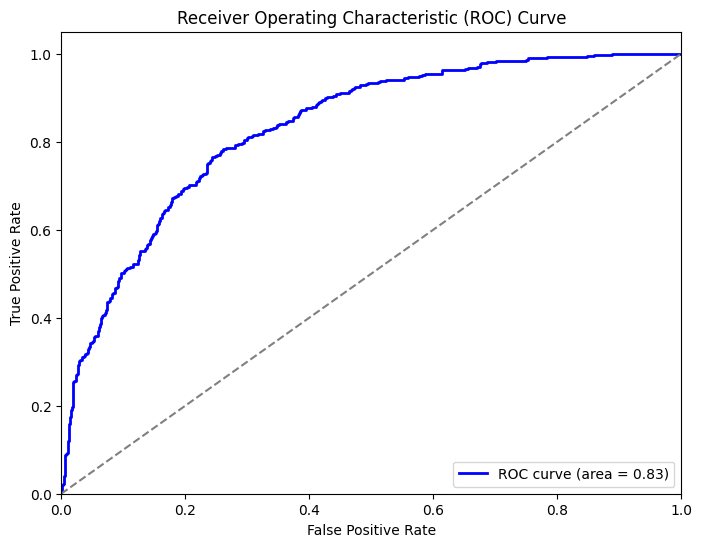

In [59]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for test set
y_probs = best_logreg.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


### Precision-Recall Curve

The Precision-Recall curve provides insights into the performance of the logistic regression model for predicting customer churn:

- **Average Precision (AP)**: The area under the Precision-Recall curve (AP) is `{average_precision:.2f}`, representing the weighted mean of precision achieved at each threshold of recall.
- **Curve Interpretation**: Higher precision and recall values closer to 1.0 indicate better model performance in identifying true positives (churned customers) while minimizing false positives.

This visualization complements the ROC curve by focusing on the precision-recall trade-off, especially useful in scenarios where class imbalance exists, such as customer churn prediction.


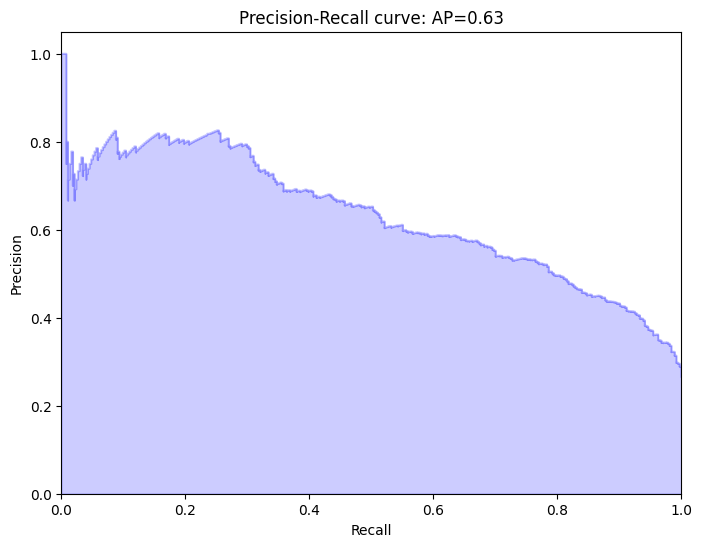

In [60]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# Compute Precision-Recall curve and area the curve
precision, recall, _ = precision_recall_curve(y_test, y_probs)
average_precision = average_precision_score(y_test, y_probs)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.show()


### Confusion Matrix

The confusion matrix visualizes the performance of the logistic regression model in predicting customer churn:

- **True Positives (TP)**: Number of customers correctly predicted to churn.
- **True Negatives (TN)**: Number of customers correctly predicted to not churn.
- **False Positives (FP)**: Number of customers incorrectly predicted to churn (Type I error).
- **False Negatives (FN)**: Number of customers incorrectly predicted to not churn (Type II error).

This heatmap representation of the confusion matrix shows:

- **Annotations**: Numbers in each cell represent the count of predictions.
- **Color Gradient**: Intensity indicates prediction accuracy, with darker shades highlighting higher counts.

Analyzing the confusion matrix helps gauge the logistic regression model's effectiveness in correctly identifying churned and non-churned customers.


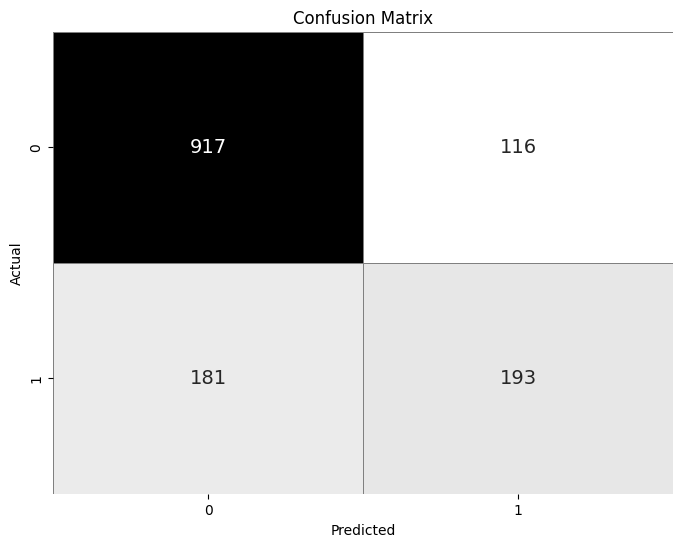

In [64]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict classes for test set
y_pred = best_logreg.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='binary', fmt='g', cbar=False,
            annot_kws={'size': 14}, linewidths=0.5, linecolor='grey')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### Oversampling with SMOTE and Using Random Forest

Here's an example of how to handle class imbalance using SMOTE (Synthetic Minority Over-sampling Technique) and applying a Random Forest classifier for prediction:

1. **SMOTE Oversampling**: SMOTE is used to generate synthetic samples for the minority class (churned customers in this case), balancing the dataset.
2. **Random Forest Classifier**: A Random Forest classifier is trained on the resampled data to predict customer churn.
3. **Prediction**: The model predicts churn on the test set (`X_test`), producing `y_pred_rf`.

This approach helps improve model performance by addressing imbalanced classes through oversampling and leveraging the ensemble learning capabilities of Random Forests for classification tasks.


In [76]:
# Example of oversampling using SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Example of using Random Forest for ensemble learning
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_resampled, y_resampled)
y_pred_rf = rf.predict(X_test)

### ROC Curve for Random Forest Classifier

The ROC (Receiver Operating Characteristic) curve visualizes the performance of the Random Forest classifier:

- **False Positive Rate (x-axis)**: Proportion of negative instances incorrectly classified as positive.
- **True Positive Rate (y-axis)**: Proportion of positive instances correctly classified as positive.
- **AUC (Area Under the Curve)**: AUC score quantifies the classifier's ability to distinguish between classes, with higher values indicating better performance.

The ROC curve above illustrates the trade-off between true positive and false positive rates across different threshold settings of the classifier.


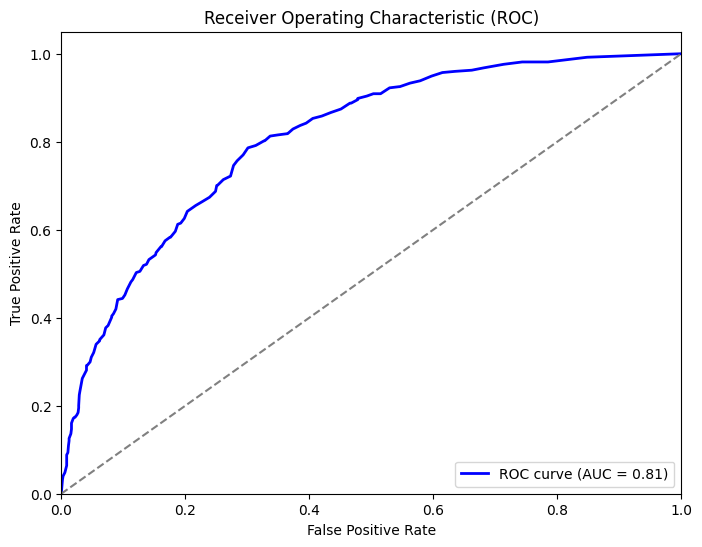

In [77]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


### Precision-Recall Curve for Random Forest Classifier

The Precision-Recall curve visualizes the trade-off between precision and recall for the Random Forest classifier:

- **Recall (x-axis)**: Proportion of actual positives correctly classified.
- **Precision (y-axis)**: Proportion of predicted positives that are actually positive.
- **Interpretation**: The curve shows how well the classifier balances between identifying all positive instances (high recall) and ensuring those identified are indeed positive (high precision).

This curve is particularly useful when dealing with imbalanced datasets, providing insights into the classifier's performance across different decision thresholds.


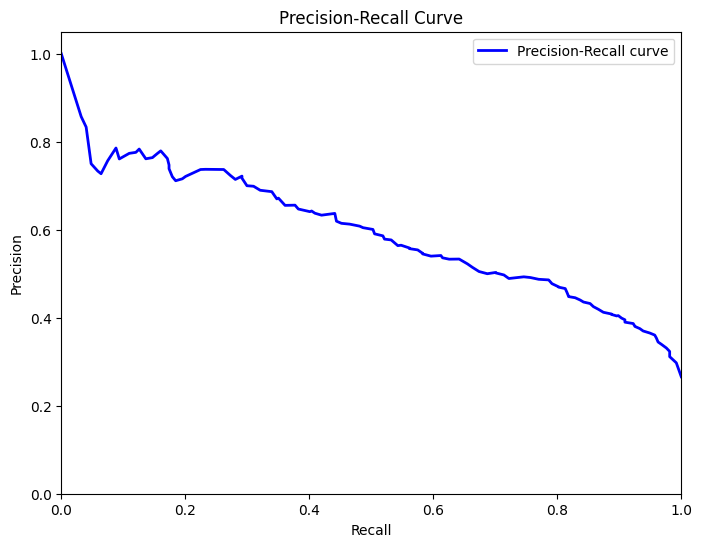

In [78]:
from sklearn.metrics import precision_recall_curve

# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, rf.predict_proba(X_test)[:, 1])

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()


### Confusion Matrix for Random Forest Classifier

The confusion matrix visualizes the performance of the Random Forest classifier:

- **True Positive (TP)**: Actual churned customers correctly predicted as churned.
- **False Positive (FP)**: Non-churned customers incorrectly predicted as churned.
- **True Negative (TN)**: Non-churned customers correctly predicted as non-churned.
- **False Negative (FN)**: Churned customers incorrectly predicted as non-churned.

This matrix helps assess the classifier's accuracy, highlighting where it succeeds (diagonal elements) and where it struggles (off-diagonal elements) in predicting churned and non-churned customers.


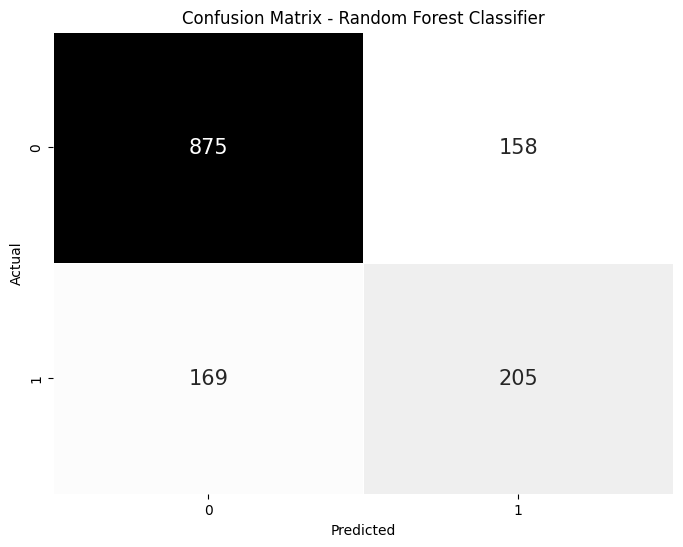

In [75]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='binary', fmt='d', cbar=False,
            annot_kws={'fontsize': 15}, linewidths=0.5)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()
